In [20]:
import sqlite3

# Create or connect to an SQLite database
connection = sqlite3.connect('student_grades.db')

# Check if the connection was successful
print("Database created and connected!")

Database created and connected!


In [22]:
# Create a cursor object
cursor = connection.cursor()

# Explanation
print("Cursor created!")

Cursor created!


In [24]:
# Create the students table
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

print("Students table created!")

# Create the grades table
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

print("Grades table created!")

connection.commit()

Students table created!
Grades table created!


In [26]:
# Insert into the students table
students_data = [
    ('Alice', 'Smith'),
    ('Bob', 'White'),
    ('Carol', 'Brown'),
    ('David', 'Davis'),
    ('Eve', 'Marshal')
]

# Insert data into the table
cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', students_data)

# Commit the transaction
connection.commit()

print("Data inserted into the students table!")

Data inserted into the students table!


In [28]:
# Insert into the grades table
grades_data = [
    (1, 'Math', 95), (1, 'English', 88), (1, 'History', 90),
    (2, 'Math', 82), (2, 'English', 76), (2, 'History', 85),
    (3, 'Math', 78), (3, 'English', 92), (3, 'History', 88),
    (4, 'Math', 85), (4, 'English', 87), (4, 'History', 90),
    (5, 'Math', 92), (5, 'English', 94), (5, 'History', 89)
]

# Insert data into the table
cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grades_data)

# Commit the transaction
connection.commit()

print("Data inserted into the grades table!")

Data inserted into the grades table!


In [30]:
# Retrieve students' names and their grades
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')
# Fetch and display the results
joined_data = cursor.fetchall()

print("Joined students and grades details:")
for row in joined_data:
    print(row)

Joined students and grades details:
('Alice', 'Smith', 'Math', 95)
('Alice', 'Smith', 'English', 88)
('Alice', 'Smith', 'History', 90)
('Bob', 'White', 'Math', 82)
('Bob', 'White', 'English', 76)
('Bob', 'White', 'History', 85)
('Carol', 'Brown', 'Math', 78)
('Carol', 'Brown', 'English', 92)
('Carol', 'Brown', 'History', 88)
('David', 'Davis', 'Math', 85)
('David', 'Davis', 'English', 87)
('David', 'Davis', 'History', 90)
('Eve', 'Marshal', 'Math', 92)
('Eve', 'Marshal', 'English', 94)
('Eve', 'Marshal', 'History', 89)


In [32]:
# Average grade for each student
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) as average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')
average_grade = cursor.fetchall()
print("Average grade for each student:")
for row in average_grade:
    print(row)

Average grade for each student:
('Alice', 'Smith', 91.0)
('Bob', 'White', 81.0)
('Carol', 'Brown', 86.0)
('David', 'Davis', 87.33333333333333)
('Eve', 'Marshal', 91.66666666666667)


In [34]:
# Student with the highest average grade
cursor.execute('''
SELECT students.first_name, students.last_name
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
ORDER BY AVG(grade) DESC
LIMIT 1
''')
best_student = cursor.fetchone()
print(f"Student with the highest average grade: {best_student[0]}")

Student with the highest average grade: Eve


In [36]:
# Average Math grade
cursor.execute('''
SELECT AVG(grade) FROM grades WHERE subject = "Math"
''')
average_math = cursor.fetchone()
print(f"Average Math grade: {average_math[0]}")

Average Math grade: 86.4


In [38]:
# Students who scored above 90 in any subject
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90
''')
top_scorers = cursor.fetchall()
print("Students who scored above 90 in any subject:")
for row in top_scorers:
    print(row)

Students who scored above 90 in any subject:
('Alice', 'Smith', 'Math', 95)
('Carol', 'Brown', 'English', 92)
('Eve', 'Marshal', 'Math', 92)
('Eve', 'Marshal', 'English', 94)


In [40]:
# Load data into Pandas DataFrames
import pandas as pd
students_df = pd.read_sql_query('SELECT * FROM students', connection)
grades_df = pd.read_sql_query('SELECT * FROM grades', connection)

# Join students and grades data
combined_df = pd.read_sql_query('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''', connection)

combined_df

,first_name,last_name,subject,grade
0,Alice,Smith,Math,95
1,Alice,Smith,English,88
2,Alice,Smith,History,90
3,Bob,White,Math,82
4,Bob,White,English,76
5,Bob,White,History,85
6,Carol,Brown,Math,78
7,Carol,Brown,English,92
8,Carol,Brown,History,88
9,David,Davis,Math,85


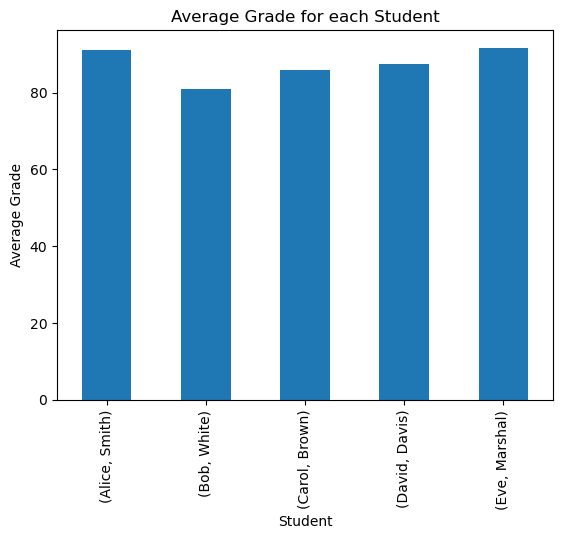

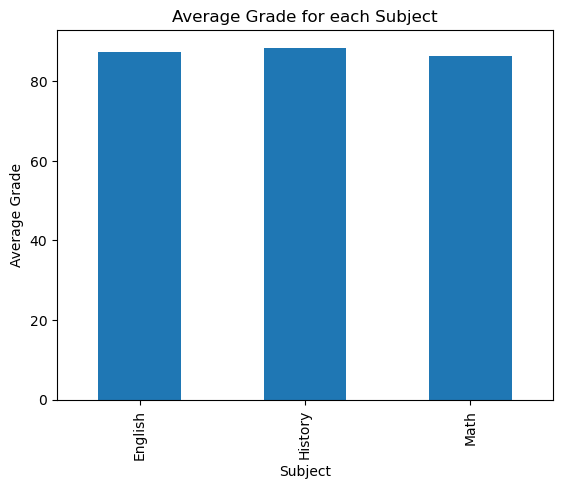

In [42]:
import matplotlib.pyplot as plt

# 1. Plot average grades for each student
average_grades = combined_df.groupby(['first_name', 'last_name'])['grade'].mean()
average_grades.plot(kind='bar')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grade for each Student')
plt.show()

# 2. Create a bar chart showing the average grade for each subject
average_subject = combined_df.groupby('subject')['grade'].mean()
average_subject.plot(kind='bar')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade for each Subject')
plt.show()

In [44]:
connection.close()